In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

hdul = fits.open('data/casa_0.5-1.5keV.fits.gz')
hdul.info()

Filename: data/casa_0.5-1.5keV.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (1024, 1024)   float32   


In [3]:
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'Cassiopeia A'                                                        
DATE-OBS= '2007-12-05T22:01:59'                                                 
DATE-END= '2007-12-08T20:07:24'                                                 
LTM1_1  =                    1                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    1                                                  
LTV1    =                -36

In [4]:
data = hdul[0].data
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

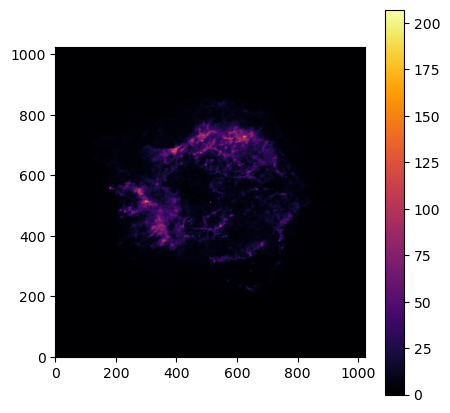

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(data, origin='lower', cmap='inferno')
plt.colorbar()
plt.show()

In [11]:
from astropy.wcs import WCS

coord = WCS(hdul[0].header)
coord

Set MJD-END to 54442.838472 from DATE-END'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 350.8841248  58.78133011  
CRPIX : 445.5  289.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001366666693  0.0001366666693  
NAXIS : 1024  1024

In [29]:
coord

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 350.8841248  58.78133011  
CRPIX : 445.5  289.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001366666693  0.0001366666693  
NAXIS : 1024  1024

In [12]:
from astropy.coordinates import SkyCoord

SkyCoord.from_pixel(0,0, coord)

<SkyCoord (ICRS): (ra, dec) in deg
    (351.00119731, 58.74184873)>

In [14]:
SkyCoord.from_name('Cas A')

<SkyCoord (ICRS): (ra, dec) in deg
    (350.85, 58.815)>

In [15]:
CasA_position = SkyCoord.from_name('Cas A')
CasA_position

<SkyCoord (ICRS): (ra, dec) in deg
    (350.85, 58.815)>

In [16]:
CasA_position.to_pixel(coord)

(array(573.79215824), array(534.89801134))

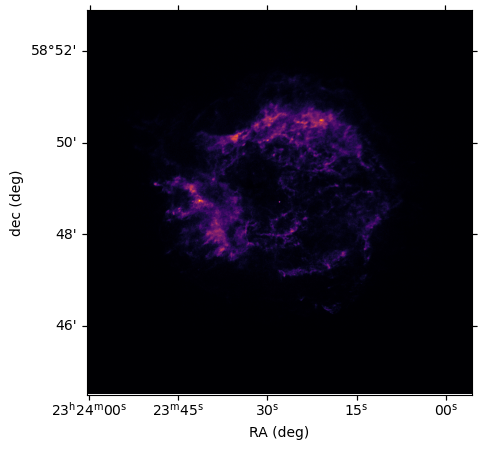

In [37]:
plt.figure(figsize=(5,5))
plt.subplot(projection=coord)
plt.imshow(data, origin='lower', cmap='inferno')
plt.xlabel('RA (deg)')
plt.ylabel('dec (deg)')
plt.show()

In [35]:
raCasA = CasA_position.icrs.ra.deg

In [34]:
decCasA = CasA_position.icrs.dec.deg

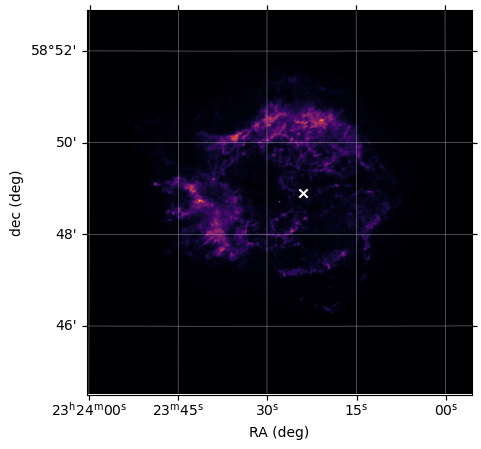

In [44]:
plt.figure(figsize=(5,5))
ax = plt.subplot(projection=coord)
ax.imshow(data, origin='lower', cmap='inferno')
ax.scatter(raCasA, decCasA, transform= ax.get_transform('icrs'), color='white', marker='x')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('dec (deg)')
ax.grid(linewidth=0.3)
plt.show()